<a href="https://colab.research.google.com/github/m04ale5/03MIAR---Algoritmos-de-Optimizacion/blob/main/Francisco_Morales_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Francisco Morales Peris <br>
Link:   https://colab.research.google.com/drive/1k6kYEHEYl3rJH-f_Ub1fg4tQBdiyU_1q?usp=sharing<br>
Github: https://github.com/m04ale5/03MIAR---Algoritmos-de-Optimizacion
<br>

In [2]:
import math

In [1]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [7]:
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((0,1,2,3),COSTES)



73

In [8]:

#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [9]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [10]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


# Análisis para mejorar nota:


In [13]:
import random
import time
import itertools

# Función para generar una matriz aleatoria de tamaño n x n
def generar_matriz_aleatoria(n):
    return [[random.randint(1, 50) for _ in range(n)] for _ in range(n)]

# Cálculo del valor de una solución parcial
def valor(S, COSTES):
    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[S[i]][i]
    return VALOR

# Función de fuerza bruta
def fuerza_bruta(COSTES):
    mejor_valor = float('inf')
    mejor_solucion = ()

    for s in itertools.permutations(range(len(COSTES))):
        valor_tmp = valor(s, COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s

    return mejor_solucion, mejor_valor


#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

# Función de ramificación y poda
def ramificacion_y_poda(COSTES):
    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
    CotaSup = valor(MEJOR_SOLUCION, COSTES)

    NODOS = [{'s': (), 'ci': valor((), COSTES)}]

    iteracion = 0

    while len(NODOS) > 0:
        iteracion += 1

        nodo_prometedor = min(NODOS, key=lambda x: x['ci'])['s']

        HIJOS = [{'s': x['s'], 'ci': valor(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]

        NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
        if len(NODO_FINAL) > 0:
            if NODO_FINAL[0]['ci'] < CotaSup:
                CotaSup = NODO_FINAL[0]['ci']
                MEJOR_SOLUCION = NODO_FINAL[0]['s']

        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]

        NODOS.extend(HIJOS)
        NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

    return MEJOR_SOLUCION, CotaSup, iteracion

# Función para ejecutar ambos algoritmos en una matriz aleatoria
def ejecutar_algoritmos(dimension):
    COSTES = generar_matriz_aleatoria(dimension)

    # Fuerza Bruta
    start_time = time.time()
    solucion_fb, valor_fb = fuerza_bruta(COSTES)
    fb_elapsed_time = time.time() - start_time

    # Ramificación y Poda
    start_time = time.time()
    solucion_rp, valor_rp, iteraciones_rp = ramificacion_y_poda(COSTES)
    rp_elapsed_time = time.time() - start_time

    print(f"Matriz de dimensión {dimension}x{dimension}:")
    print("Fuerza Bruta: Solución =", solucion_fb, " Valor =", valor_fb, " Tiempo =", fb_elapsed_time)
    print("Ramificación y Poda: Solución =", solucion_rp, " Valor =", valor_rp, " Iteraciones =", iteraciones_rp, " Tiempo =", rp_elapsed_time)
    print()

# Ejecutar para matrices de 5x5 , 6x6, 7x7 , 8x8 , 9x9 y 10x10
ejecutar_algoritmos(5)
ejecutar_algoritmos(6)
ejecutar_algoritmos(7)
ejecutar_algoritmos(8)
ejecutar_algoritmos(10)

Matriz de dimensión 5x5:
Fuerza Bruta: Solución = (4, 3, 2, 1, 0)  Valor = 64  Tiempo = 0.0001964569091796875
Ramificación y Poda: Solución = (4, 3, 2, 1, 0)  Valor = 64  Iteraciones = 70  Tiempo = 0.0012352466583251953

Matriz de dimensión 6x6:
Fuerza Bruta: Solución = (1, 2, 5, 3, 4, 0)  Valor = 81  Tiempo = 0.011518478393554688
Ramificación y Poda: Solución = (1, 2, 5, 3, 4, 0)  Valor = 81  Iteraciones = 164  Tiempo = 0.027586936950683594

Matriz de dimensión 7x7:
Fuerza Bruta: Solución = (6, 5, 0, 1, 2, 4, 3)  Valor = 66  Tiempo = 0.014539241790771484
Ramificación y Poda: Solución = (6, 5, 0, 1, 2, 4, 3)  Valor = 66  Iteraciones = 720  Tiempo = 0.11092305183410645

Matriz de dimensión 8x8:
Fuerza Bruta: Solución = (6, 5, 7, 2, 3, 1, 4, 0)  Valor = 61  Tiempo = 0.05347394943237305
Ramificación y Poda: Solución = (6, 5, 7, 2, 3, 1, 4, 0)  Valor = 61  Iteraciones = 892  Tiempo = 0.06462550163269043

Matriz de dimensión 10x10:
Fuerza Bruta: Solución = (2, 8, 1, 6, 7, 9, 5, 0, 4, 3)  Va

## Observaciones:

En las matrices de 5x5 y 6x6, tanto el algoritmo de fuerza bruta como el de ramificación y poda logran encontrar soluciones óptimas con valores idénticos. Esto sugiere que, para problemas de tamaño moderado, ambas estrategias son eficientes y proporcionan resultados correctos.

A medida que aumentamos la dimensión a 7x7, nuevamente se encuentra una solución óptima. Sin embargo, el tiempo de ejecución, especialmente para el algoritmo de fuerza bruta, muestra un aumento significativo. Este comportamiento era de esperar, ya que la complejidad exponencial del algoritmo de fuerza bruta empieza a ser más evidente.

En la matriz de 8x8, los resultados siguen la misma tendencia observada en las matrices anteriores, con soluciones óptimas obtenidas. Sin embargo, el tiempo de ejecución, particularmente para el algoritmo de fuerza bruta, experimenta un aumento más pronunciado. Este fenómeno subraya la limitación del enfoque de fuerza bruta a medida que la dimensión del problema crece.

En general, estos resultados indican que, a medida que se abordan matrices de mayor dimensión, el algoritmo de fuerza bruta se vuelve menos eficiente debido a su complejidad exponencial. Por otro lado, el algoritmo de ramificación y poda sigue siendo una alternativa viable, mostrando una mejora en la eficiencia en comparación con la fuerza bruta. No obstante, es importante notar que el tiempo de ejecución de ramificación y poda también aumenta a medida que la dimensión crece, aunque a un ritmo menor en comparación con la fuerza bruta. Este balance entre eficiencia y escalabilidad resalta la importancia de seleccionar el enfoque algorítmico adecuado según el tamaño del problema.

# Descenso del gradiente

In [14]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

In [15]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

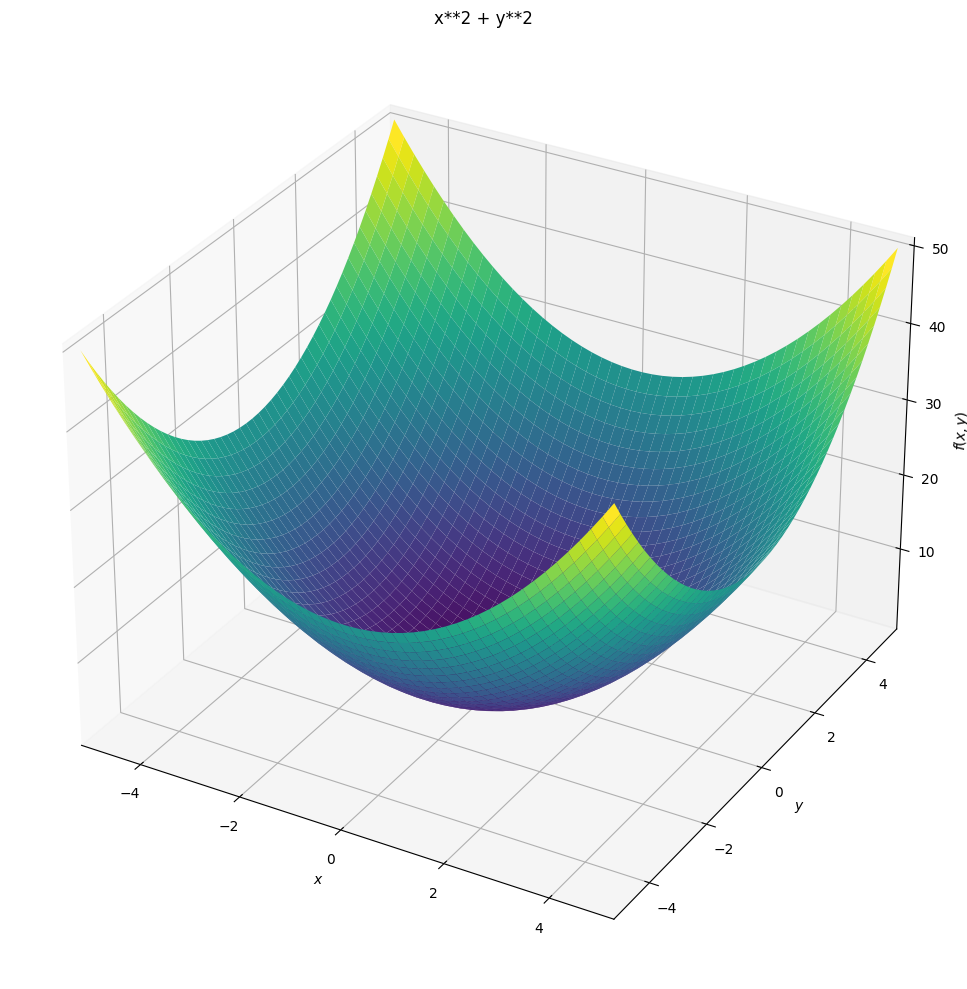

In [16]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

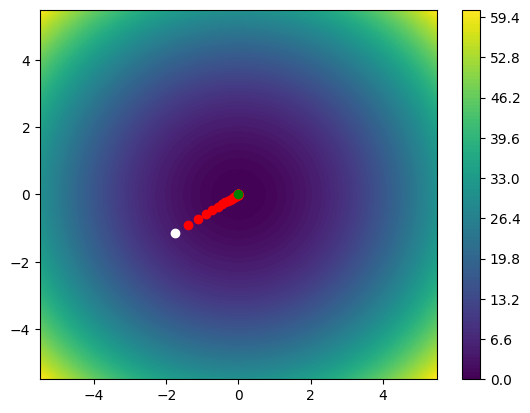

Solucion: [-2.520304149281601e-05, -1.623795767980988e-05] 8.988645700999021e-10


In [17]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

# Minimizar la función por descenso del gradiente
## ¿Te atreves a optimizar la función?:

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>

In [18]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

# Derivadas parciales de la función respecto a cada variable
df_dx1 = lambda X: X[0] * math.cos(2*X[0] + 1 - math.exp(X[1])) * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) - math.sin(2*X[0] + 1 - math.exp(X[1])) * math.exp(X[1]) / 2
df_dx2 = lambda X: 1/2 * X[1] * math.sin(2*X[0] + 1 - math.exp(X[1])) * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) + math.sin(2*X[0] + 1 - math.exp(X[1])) * math.exp(X[1])

# Inicializamos valores
X = [1.0, 1.0]  # Valores iniciales
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 100  # Número de iteraciones

# Descenso del gradiente
for epoch in range(epochs):
    gradient = [df_dx1(X), df_dx2(X)]  # Calculamos el gradiente
    X[0] = X[0] - learning_rate * gradient[0]  # Actualizamos X[0]
    X[1] = X[1] - learning_rate * gradient[1]  # Actualizamos X[1]

# Imprimimos el resultado final
print("Resultado después de {} iteraciones: {}".format(epochs, X))
print("Valor mínimo de la función: {}".format(f(X)))


Resultado después de 100 iteraciones: [1.1955896287429622, -0.026318303912628675]
Valor mínimo de la función: 0.4059742442126716


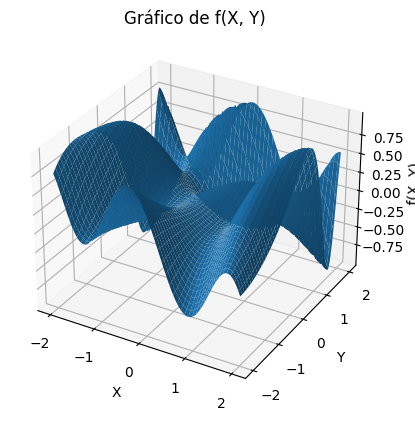

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2*X[0] + 1 - np.exp(X[1]))

# Creamos los puntos en el rango que queremos graficar
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Creamos la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficamos la superficie
ax.plot_surface(X, Y, Z)

# Añadimos etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Gráfico de f(X, Y)')

# Mostramos el gráfico
plt.show()


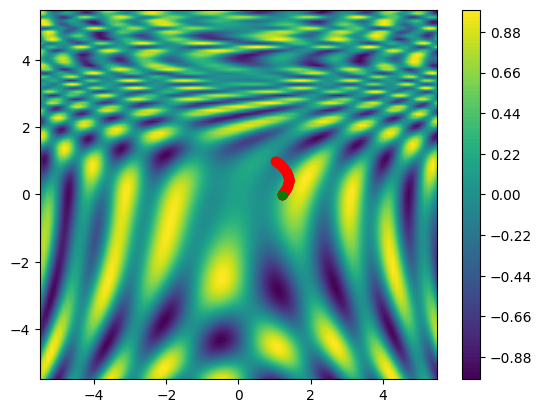

Resultado después de 100 iteraciones: [1.1955896287429622, -0.026318303912628675]
Valor mínimo de la función: 0.4059742442126716


In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Definimos la función
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

# Derivadas parciales de la función respecto a cada variable
df_dx1 = lambda X: X[0] * math.cos(2*X[0] + 1 - math.exp(X[1])) * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) - math.sin(2*X[0] + 1 - math.exp(X[1])) * math.exp(X[1]) / 2
df_dx2 = lambda X: 1/2 * X[1] * math.sin(2*X[0] + 1 - math.exp(X[1])) * math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) + math.sin(2*X[0] + 1 - math.exp(X[1])) * math.exp(X[1])

# Inicializamos valores
X = [1.0, 1.0]  # Valores iniciales
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 100  # Número de iteraciones

# Descenso del gradiente
for epoch in range(epochs):
    gradient = [df_dx1(X), df_dx2(X)]  # Calculamos el gradiente
    X[0] = X[0] - learning_rate * gradient[0]  # Actualizamos X[0]
    X[1] = X[1] - learning_rate * gradient[1]  # Actualizamos X[1]
    plt.plot(X[0], X[1], "o", c="red")

# Preparamos los datos para dibujar el mapa de niveles de Z
resolucion = 100
rango = 5.5
X_values = np.linspace(-rango, rango, resolucion)
Y_values = np.linspace(-rango, rango, resolucion)
Z_values = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X_values):
    for iy, y in enumerate(Y_values):
        Z_values[iy, ix] = f([x, y])

# Pintamos el mapa de niveles de Z
plt.contourf(X_values, Y_values, Z_values, resolucion)
plt.colorbar()


# Pintamos el punto final y pintamos de verde
plt.plot(X[0], X[1], "o", c="green")

plt.show()

# Imprimimos el resultado final
print("Resultado después de {} iteraciones: {}".format(epochs, X))
print("Valor mínimo de la función: {}".format(f(X)))
